<a href="https://colab.research.google.com/github/willyptrain/BME6550_MolecularDataScience/blob/main/Peterson_Will_HW1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 1A**

1. Estimation of a sample mean from a normally distributed variable. Let us assume that a true
distribution of a process is described by the normal distribution with mu=3 and sigma=1. You have a
measurement technique that allows you to sample n points from this distribution. In Matlab this is a
random number generator whose numbers will be chosen from the desired normal distribution by using
the call normrnd(mu, sigma, [1, n]). Sample from this normal distribution from n=1 to 50 (I.e. n=1:50).
(i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the
1000 trials).
    
  a. (2) Plot the standard deviation of the estimate of the sample mean versus n. Add a second line
which is 1/sqrt(n). Describe what this tells you about the relationship between n and your power to
estimate the underlying mean.

  

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


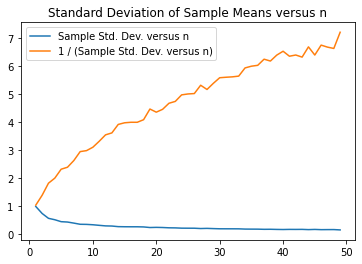

In [9]:
import numpy as np
import matplotlib.pyplot as plt

mu = 3
sigma = 1

def get_sample_mean_of_size(n):
  return np.random.normal(mu, sigma, n)

def sample_1000(n):
  samples = []
  for i in range(0, 1000):
    samples.append(np.mean(get_sample_mean_of_size(n)))
  return np.array(samples)
  

x = []
sample_stds = []
for i in range(0, 50):
  x.append(i)
  sample_stds.append(np.std(sample_1000(i)))

plt.title("Standard Deviation of Sample Means versus n")
plt.plot(x, sample_stds, label='Sample Std. Dev. versus n')
plt.plot(x, 1/np.array(sample_stds), label='1 / (Sample Std. Dev. versus n)')
plt.legend()
plt.show()

b. (2) Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot
view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to
the plot in 1a (I.e. What information do you gain or lose in the two different plotting schemes)?


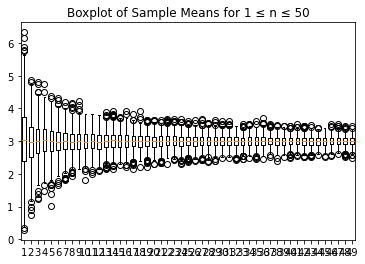

In [10]:
sample_means = []
for i in range(1, 50):
  sample_means.append(sample_1000(i))

plt.title("Boxplot of Sample Means for 1 ≤ n ≤ 50")
plt.boxplot(sample_means, positions=np.arange(1,50))
plt.show()

c. (3) For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test to
see if this sample distribution is normal (hint you will need to translate this to the standard normal
distribution). Report the sample mean and sample standard deviation, the p-value from the test,
and whether you would reject the null hypothesis.
  

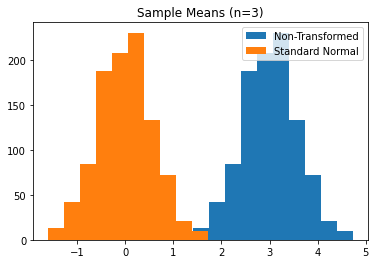

In [11]:
def transform_mean(sample, mean, std):
  return np.mean((sample - mean) / std)


n = 3
sample3 = sample_1000(n)

untransformed_means = [np.mean(i) for i in sample3]
transformed_means = [transform_mean(np.mean(i), mu, sigma) for i in sample3]
plt.title("Sample Means (n=3)")
plt.hist(untransformed_means, label='Non-Transformed')
plt.hist(transformed_means, label='Standard Normal')
plt.legend()
plt.show()

In [12]:
from collections import Counter as ctr
import statsmodels.api as sm
from scipy.stats import kstest

print("Sample Mean:", np.mean(untransformed_means))
print("Sample Standard Deviation:", np.std(untransformed_means))
ks_test = kstest(transformed_means, 'norm', alternative='greater')
print("P-Value:", ks_test.pvalue)
print("Reject?", "Yes, because p-value is significantly lower than 0.05")


Sample Mean: 2.997302700449107
Sample Standard Deviation: 0.5679425902460189
P-Value: 1.11762676640428e-17
Reject? Yes, because p-value is significantly lower than 0.05


 d. (3) Repeat 1c but for n=20. What changes when the number of samples increases?


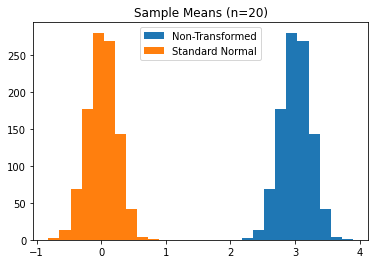

Sample Mean: 3.0066018338470077
Sample Standard Deviation: 0.22637028568088355
P-Value: 1.2203728157808426e-85
Reject? Yes, because p-value is significantly lower than 0.05


In [13]:
n = 20
sample20 = sample_1000(n)

untransformed_means = [np.mean(i) for i in sample20]
transformed_means = [transform_mean(np.mean(i), mu, sigma) for i in sample20]
plt.title("Sample Means (n=20)")
plt.hist(untransformed_means, label='Non-Transformed')
plt.hist(transformed_means, label='Standard Normal')
plt.legend()
plt.show()

print("Sample Mean:", np.mean(untransformed_means))
print("Sample Standard Deviation:", np.std(untransformed_means))
ks_test = kstest(transformed_means, 'norm', alternative='greater')
print("P-Value:", ks_test.pvalue)
print("Reject?", "Yes, because p-value is significantly lower than 0.05")

e. (2) What happens if you use the Kolmogorov-Smirnov test without translating to the standard normal distribution? Provide the p-value for one test in part 1d and explain what this means.


In [14]:
ks_test = kstest(untransformed_means, 'norm', alternative='greater')
print("P-Value:", ks_test.pvalue)
print("Reject?", "No, because p-value is significantly higher than 0.05")

P-Value: 0.9999484064571088
Reject? No, because p-value is significantly higher than 0.05


**2. Weibull distribution. Now we will explore sampling from an alternate distribution type.**

  a. (1) Before you begin, we are going to repeat number #1 using a different distribution for sampling.
Given the central limit theorem, what do you expect should happen when you sample from this new
distribution? Briefly describe in words what might be different and what might be the same.

b. (2) Sample the Weibull distribution with parameters alpha(A) = 1 and Beta(B) = 1, 1000 times. Plot
the histogram of these values. Describe the shape of this histogram in words. Is it anything like the
normal distribution?



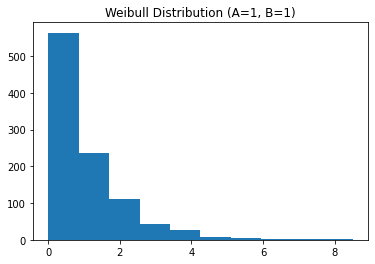

In [15]:
from random import weibullvariate

def get_weibull_sample(n, a=1, b=1):
  sample = []
  for i in range(0, n):
    sample.append(weibullvariate(alpha=a,beta=b))
  return sample

weibull_sample = get_weibull_sample(1000)
plt.title("Weibull Distribution (A=1, B=1)")
plt.hist(weibull_sample)
plt.show()


c. (3) As in problem 1, plot a boxplot of the sample means distribution of the Weibull with A=1,B=1
from n=1:50. How does this differ from the plot in 1b and why? Plot the standard deviations of the
sample means versus n. Is this any different?



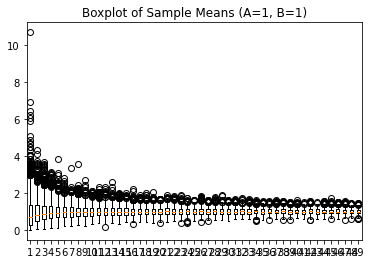

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide


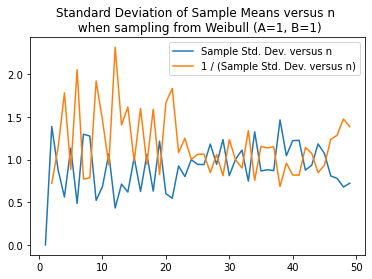

In [16]:
import numpy as np
import matplotlib.pyplot as plt



def weibull_get_sample_mean_of_size(n,a=1,b=1):
  return get_weibull_sample(n,a,b)

def weibull_sample_1000(n, a=1, b=1):
  samples = []
  for i in range(0, 1000):
    samples.append(np.mean(weibull_get_sample_mean_of_size(n, a, b)))
  return np.array(samples)



weibull_sample_means = []
weibull_std = []
for i in range(1, 50):
  weibull_sample_means.append(weibull_sample_1000(i))
  weibull_std.append(np.std(weibull_get_sample_mean_of_size(i)))



plt.title("Boxplot of Sample Means (A=1, B=1)")
plt.boxplot(weibull_sample_means, positions=np.arange(1,50))
plt.show()

plt.title("Standard Deviation of Sample Means versus n \n when sampling from Weibull (A=1, B=1)")
plt.plot(np.arange(1,50), weibull_std, label='Sample Std. Dev. versus n')
plt.plot(np.arange(1,50), 1/np.array(weibull_std), label='1 / (Sample Std. Dev. versus n)')
plt.legend()
plt.show()

d. (3) For n=3, plot the histogram of the sample means. What is this distribution, is it Weibull or
normal? Report your test results.



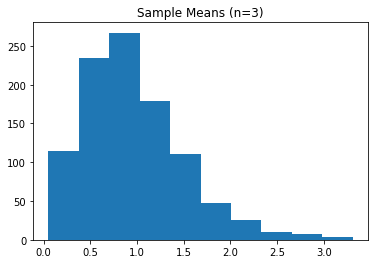

Sample Mean: 0.9658755418084336
Sample Standard Deviation: 0.53461612480469
P-Value: 0.9992559840977239
Reject? No, because p-value is significantly higher than any reasonable alpha level


In [17]:
def transform_mean(sample, mean, std):
  return np.mean((sample - mean) / std)


n = 3
weibull_sample3 = weibull_sample_1000(n)


untransformed_means = [np.mean(i) for i in weibull_sample3]
transformed_means = [abs(transform_mean(np.mean(i), mu, sigma)) for i in weibull_sample3]
plt.title("Sample Means (n=3)")
plt.hist(untransformed_means, label='original')
plt.show()

print("Sample Mean:", np.mean(untransformed_means))
print("Sample Standard Deviation:", np.std(untransformed_means))
ks_test = kstest(untransformed_means, 'norm', alternative='greater')
print("P-Value:", ks_test.pvalue)
print("Reject?", "No, because p-value is significantly higher than any reasonable alpha level")

e. (3) Plot the log base 10 transformation of the sample means from 2d. What is this distribution, is it
Weibull or normal? Report your test results and interpret the meaning of these results.



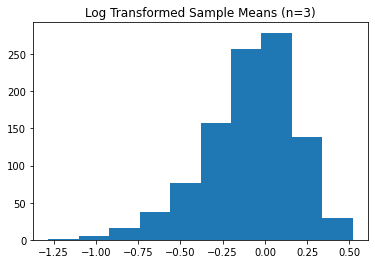

Sample Mean: -0.08802243048262966
Sample Standard Deviation: 0.2691345152899296
P-Value: 1.190217219978683e-102
Reject? Yes, because p-value is significantly lower than any reasonable alpha level


In [18]:
untransformed_means = [np.mean(i) for i in weibull_sample3]
untransformed_means = np.log10(np.array(untransformed_means))

plt.title("Log Transformed Sample Means (n=3)")
plt.hist(untransformed_means)
plt.show()


print("Sample Mean:", np.mean(untransformed_means))
print("Sample Standard Deviation:", np.std(untransformed_means))
ks_test = kstest(untransformed_means, 'norm', alternative='greater')
print("P-Value:", ks_test.pvalue)
print("Reject?", "Yes, because p-value is significantly lower than any reasonable alpha level")


f. (2) Repeat 2d and 2e for n=20 (don’t include the plots, but do include the test result for normality
and explain the impact of the number of samples n, on normality).



In [19]:
def transform_mean(sample, mean, std):
  return np.mean((sample - mean) / std)

mu = 3
sigma = 1


n = 20
weibull_sample20 = weibull_sample_1000(n)
print("-------ORIGINAL SET-------")
untransformed_means = [np.mean(i) for i in weibull_sample20]
print("Sample Mean:", np.mean(untransformed_means))
print("Sample Standard Deviation:", np.std(untransformed_means))
ks_test = kstest(untransformed_means, 'norm', alternative='greater')
print("P-Value:", ks_test.pvalue)
print("Reject?", "Yes, because p-value is less than 0.05, but certainly not as significantly as the other p-values for which we reject the null.")

print()
print("-------Log Transformed SET-------")
untransformed_means = np.log10(np.array(untransformed_means))
print("Sample Mean:", np.mean(untransformed_means))
print("Sample Standard Deviation:", np.std(untransformed_means))
ks_test = kstest(untransformed_means, 'norm', alternative='greater')
print("P-Value:", ks_test.pvalue)
print("Reject?", "Yes, because p-value is significantly lower than any reasonable alpha level")


# plt.title("Sample Means (n=20)")
# plt.hist(untransformed_means)
# plt.show()

# plt.title("Log Transformed Sample Means (n=20)")
# plt.hist(np.log10(np.array(untransformed_means)))
# plt.show()

-------ORIGINAL SET-------
Sample Mean: 0.9929305866566444
Sample Standard Deviation: 0.2137136249301594
P-Value: 0.002604853046477455
Reject? Yes, because p-value is less than 0.05, but certainly not as significantly as the other p-values for which we reject the null.

-------Log Transformed SET-------
Sample Mean: -0.013352697180129594
Sample Standard Deviation: 0.09555141930335707
P-Value: 1.0776927143903692e-158
Reject? Yes, because p-value is significantly lower than any reasonable alpha level


g. (2) Repeat 2d but with A=10 and B=2 (I.e plot the histogram of the calculated sample means for 1000 trials of n=3). What is this distribution, Weibull or normal? Why does it look different than in 1c?

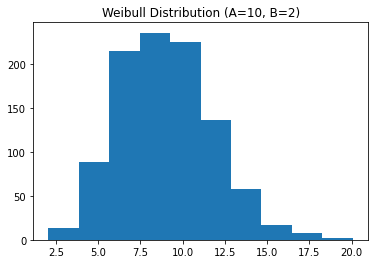

In [20]:
n = 3
weibull_sample_2g = np.array(weibull_sample_1000(n, 10, 2))

untransformed_means = [i for i in weibull_sample_2g]
plt.title("Weibull Distribution (A=10, B=2)")
plt.hist(untransformed_means)
plt.show()